# Project Objective

The main objective of this project is to create and assess machine learning models that can accurately categorize iris flowers into their respective species based on their physical measurements. This involves constructing various classification models, evaluating their effectiveness, and determining the best method for classifying iris species.

# IMPORTING libraries

In [38]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Description

In [39]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# EDA

In [40]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [41]:
print(df.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [42]:
df['species'].unique

<bound method Series.unique of 0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object>

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [44]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [50]:
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])
     

Number of rows are:  150
Number of columns are:  5


# DATA VISUALIZATION & Understand the relationships between variables

 Sepal Length vs Sepal Width by Species

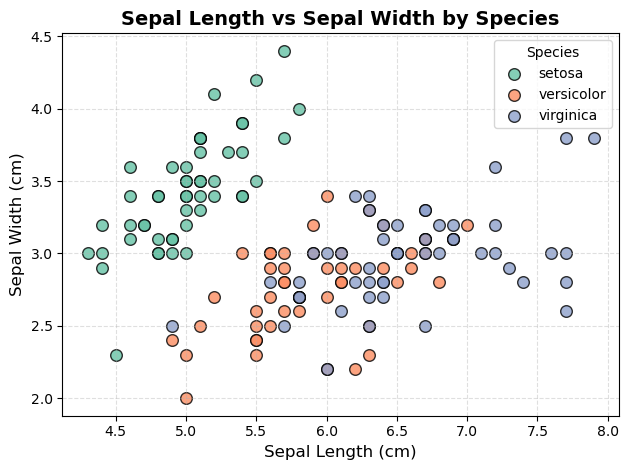

In [52]:
species = df['species'].unique()
colors = sns.color_palette("Set2", 3)

# Create scatter plot for each species
for i in range(3):
    species_data = df[df['species'] == species[i]]
    plt.scatter(
        species_data['sepal_length'], 
        species_data['sepal_width'], 
        color=colors[i], 
        label=species[i],
        edgecolor='black',
        s=70,
        alpha=0.8
    )

# Axis labels and formatting
plt.xlabel('Sepal Length (cm)', fontsize=12)
plt.ylabel('Sepal Width (cm)', fontsize=12)
plt.title('Sepal Length vs Sepal Width by Species', fontsize=14, weight='bold')
plt.legend(title='Species')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


# BOXPLOT

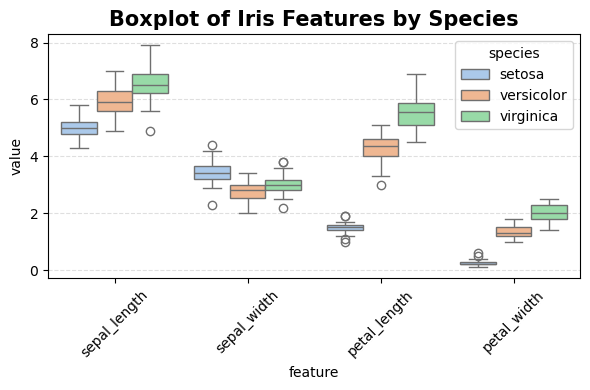

In [54]:
plt.figure(figsize=(6,4))
df_melted = df.melt(id_vars='species', var_name='feature', value_name='value')
sns.boxplot(data=df_melted, x='feature', y='value', hue='species', palette='pastel')
plt.title("Boxplot of Iris Features by Species", fontsize=15, weight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# PAIRPLOT FOR COMPARISION

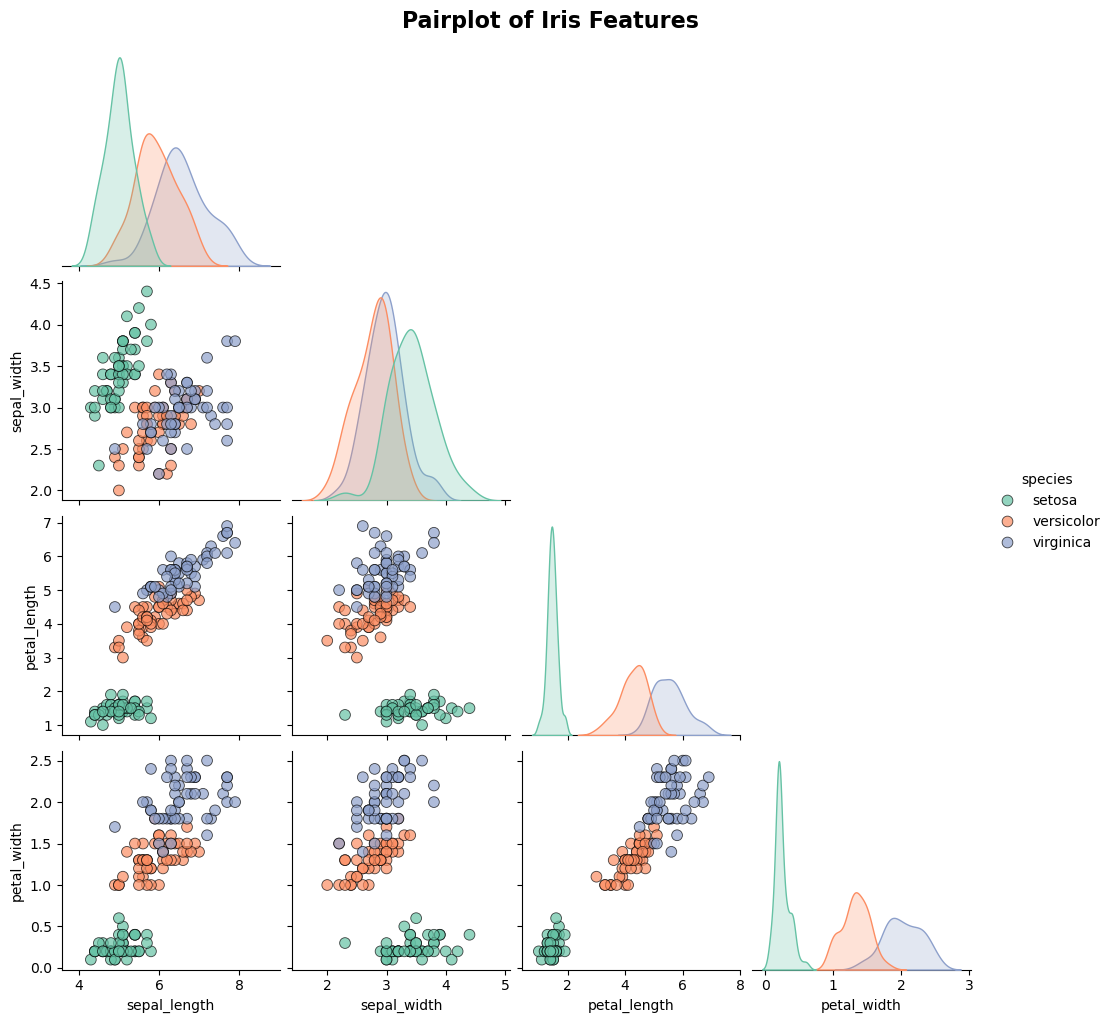

In [56]:
sns.pairplot(df, hue='species', palette='Set2', corner=True,
             plot_kws={'edgecolor': 'k', 's': 60, 'alpha': 0.7})
plt.suptitle("Pairplot of Iris Features", y=1.02, fontsize=16, weight='bold')
plt.show()


# HISTOGRAM

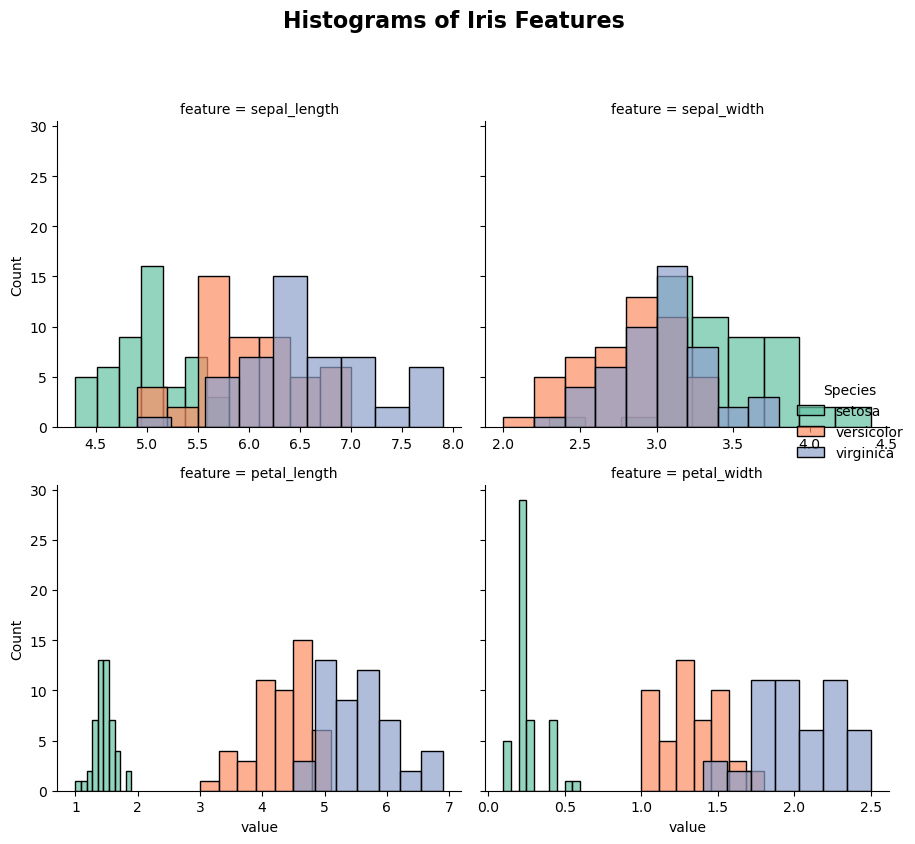

In [81]:
g = sns.FacetGrid(df_melted, col="feature", col_wrap=2, hue="species", height=4, palette='Set2', sharex=False)
g.map(sns.histplot, "value", edgecolor="black", alpha=0.7)
g.add_legend(title='Species')
g.fig.suptitle("Histograms of Iris Features", y=1.05, fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

# ENCODING

In [57]:
le = LabelEncoder()
df['species']=le.fit_transform(df['species'])

In [58]:
X=df.drop('species' , axis=1)
y=df['species']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# from logistic regression

In [61]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [62]:
import warnings
warnings.filterwarnings('ignore')

In [63]:
model.fit(X_train,y_train)

LogisticRegression()

In [64]:
y_pred = model.predict(X_test)
y_pred # pred values

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [66]:
 model.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [67]:
model.score(X_test,y_test)

1.0

# from decision tree

In [68]:
dt_mod=DecisionTreeClassifier(random_state=42)
dt_mod.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [69]:
y_pred = dt_mod.predict(X_test)

In [70]:
acc=accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 1.0


In [71]:
print("Classification")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Classification
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



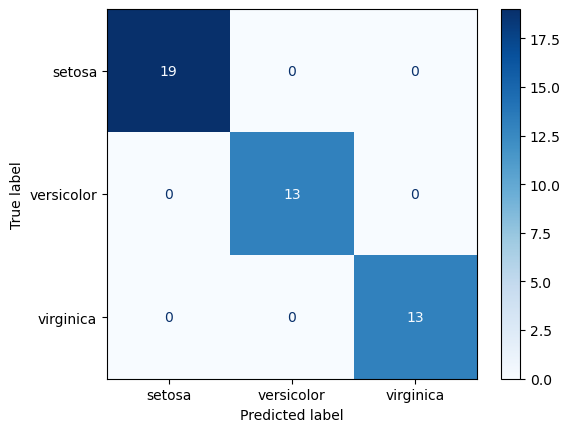

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
d= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
d.plot(cmap='Blues')


# RANDOM FOREST

In [73]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [74]:
 accuracy_score(y_test, y_pred_rf)

1.0

In [75]:
print("Classification:\n", classification_report(y_test, y_pred_rf))

Classification:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



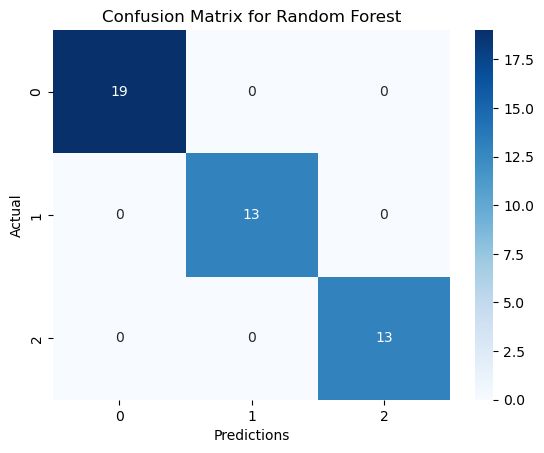

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.show()

# Cross Validation Accuracy

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Compute cross-validation scores
scores_lr = cross_val_score(LogisticRegression(max_iter=200), X, y, cv=5)
print("LGR:", scores_lr.mean())

scores_dt = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
print("DT:", scores_dt.mean())

scores_rf = cross_val_score(RandomForestClassifier(), X, y, cv=5)
print("RAN FOREST:", scores_rf.mean())



LGR: 0.9733333333333334
DT: 0.9666666666666668
RAN FOREST: 0.96


# CONCLUSION

The Iris dataset is a well-known resource in the field of machine learning, containing 150 samples of iris flowers. Each sample features four attributes: Sepal Length, Sepal Width, Petal Length, and Petal Width. The target variable in this dataset is the species of the iris flower, which can belong to one of three categories: Setosa, Versicolor, or Virginica. This dataset is frequently utilized for classification tasks and serves as a solid foundation for testing different machine learning models